y: [1.2964010e-06 2.1010637e-06 2.0302832e-06 2.1904707e-06 1.9781291e-06
 1.8738210e-06 1.4938414e-06 1.1958182e-06 7.3947012e-07 3.6507845e-07]
shape y: (926284,)
sr: 22050
y: [1.4596594e-04 5.2305048e-05 1.5740277e-04 7.2603411e-04 1.5423680e-03
 2.6311954e-03 4.1216332e-03 5.7623670e-03 7.4908398e-03 9.5333681e-03]
shape z: (221402,)
sr: 22050


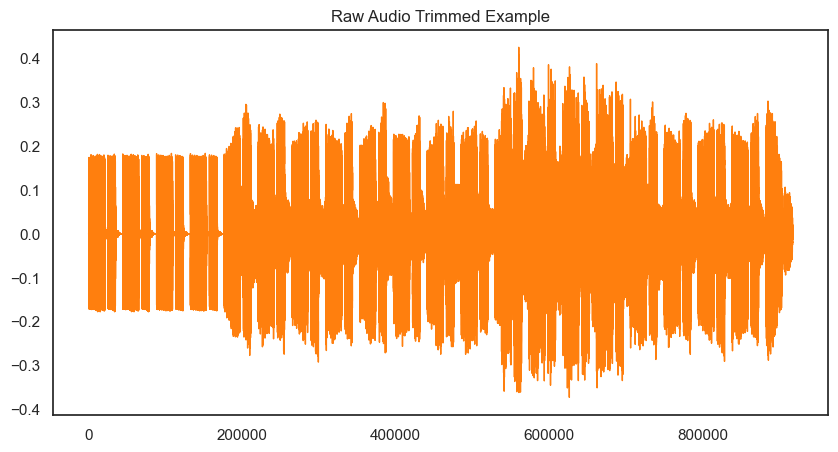

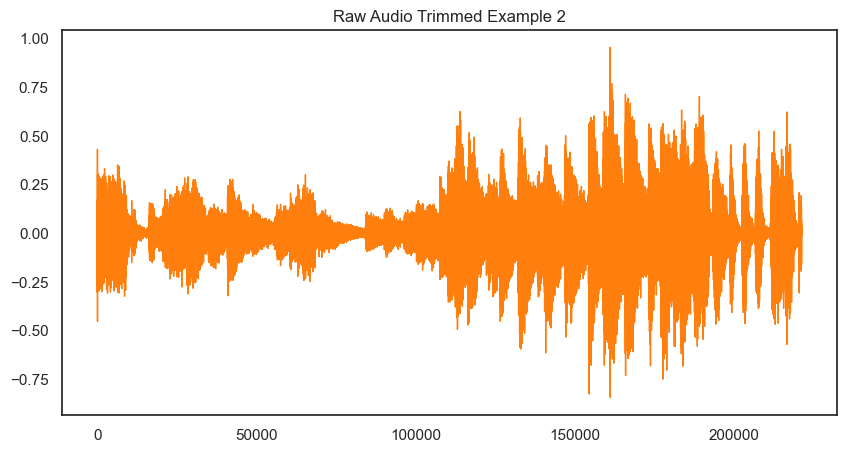

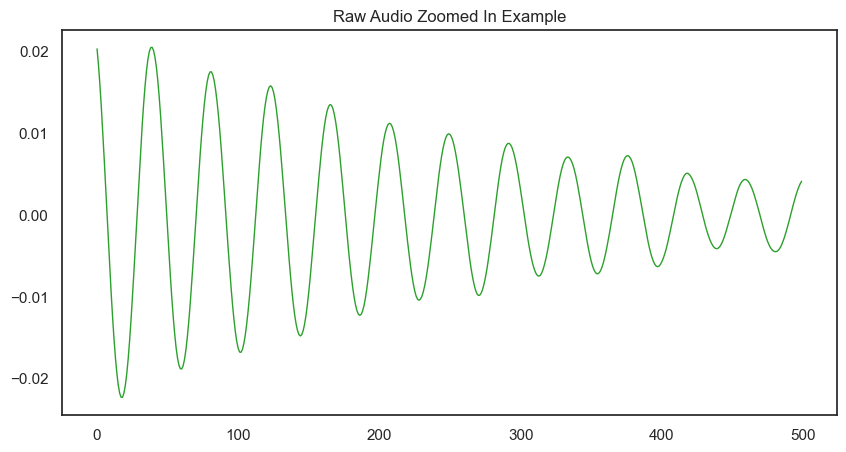

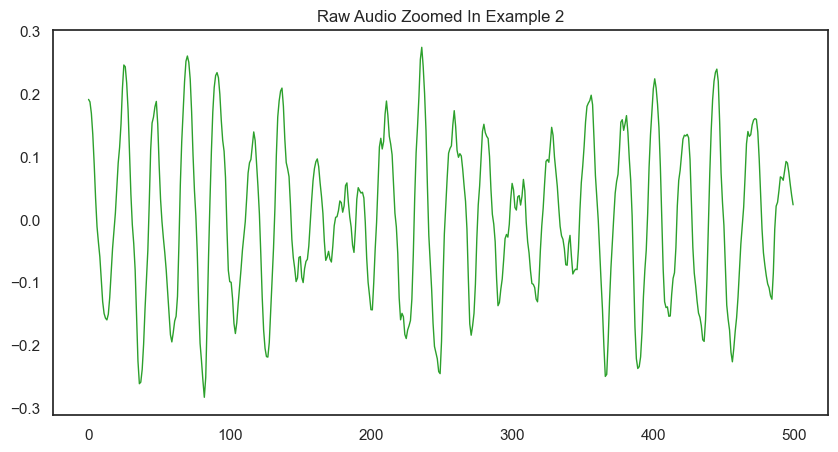

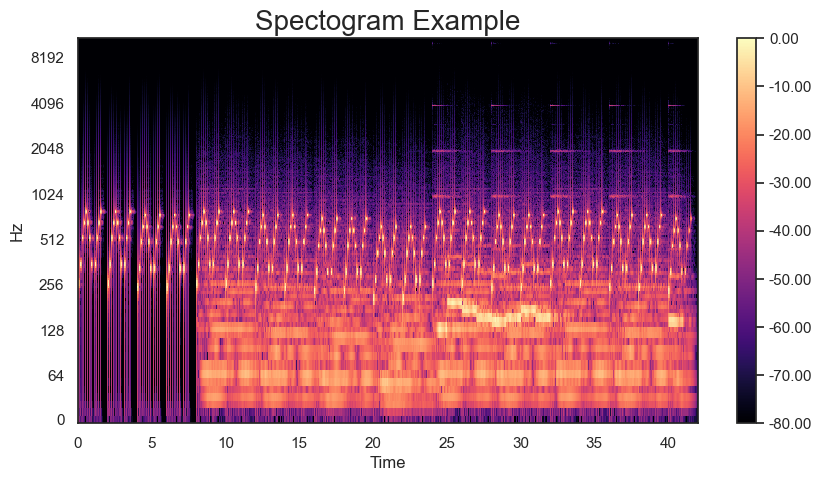

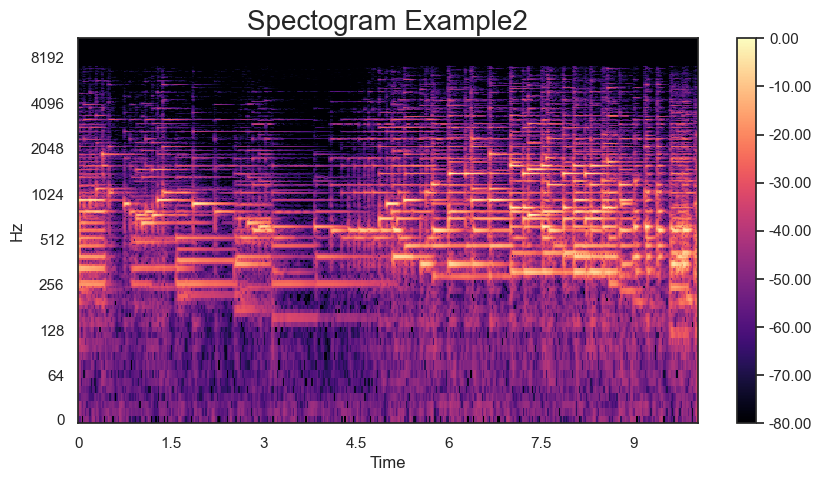

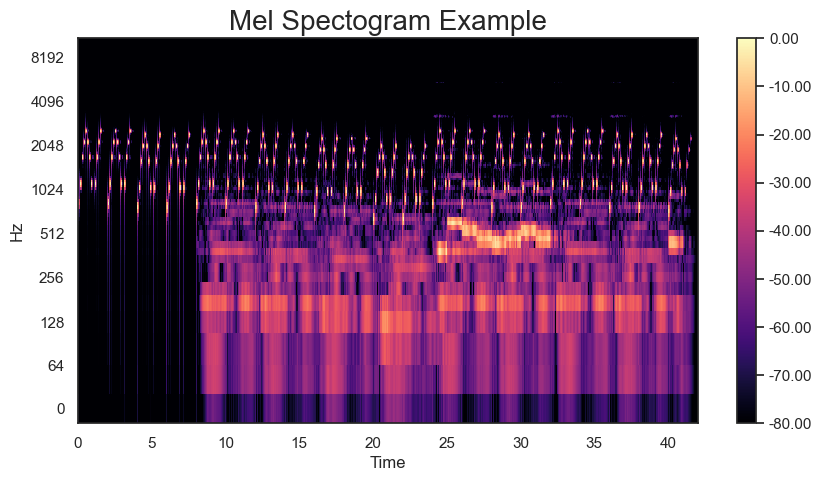

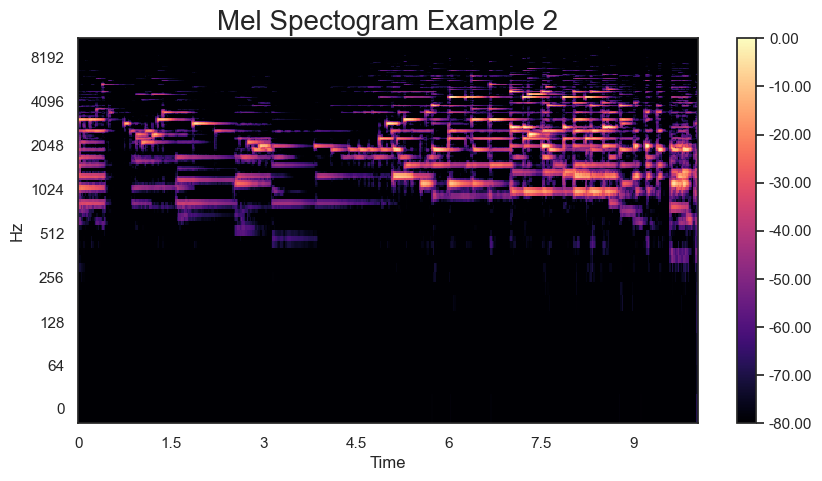

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\Parsed_songs\\*.mp3'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

audio_files = glob('C:/Users/Ranyah/Downloads/*.mp3')
ipd.Audio(audio_files[0])
ipd.Audio(audio_files[1])

y, sr = librosa.load(audio_files[0])
z, sr = librosa.load(audio_files[3])

print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

print(f'y: {z[:10]}')
print(f'shape z: {z.shape}')
print(f'sr: {sr}')


y_trimmed, _ = librosa.effects.trim(y, top_db=20)
z_trimmed, _ = librosa.effects.trim(z, top_db=20)

pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()


pd.Series(z_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example 2',
                 color=color_pal[1])
plt.show()


pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()



pd.Series(z[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example 2',
                 color=color_pal[2])
plt.show()

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape
A = librosa.stft(z)
S_db2 = librosa.amplitude_to_db(np.abs(A), ref=np.max)
S_db2.shape
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

fig2, ax2 = plt.subplots(figsize=(10, 5))
img2 = librosa.display.specshow(S_db2,
                              x_axis='time',
                              y_axis='log',
                              ax=ax2)
ax2.set_title('Spectogram Example2', fontsize=20)
fig2.colorbar(img2, ax=ax2, format=f'%0.2f')
plt.show()


S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()


S2 = librosa.feature.melspectrogram(y=z,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel2 = librosa.amplitude_to_db(S2, ref=np.max)
fig2, ax2 = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel2,
                              x_axis='time',
                              y_axis='log',
                              ax=ax2)
ax2.set_title('Mel Spectogram Example 2', fontsize=20)
fig2.colorbar(img2, ax=ax2, format=f'%0.2f')
plt.show()

similar_audio = os.path.join('data', 'Parsed_Similar', 'ThinkingOutLoud.mp3')
NOT_similar_audio = os.path.join('data', 'Parsed_Not_Similar', 'LetsGetItOn.mp3')

POS = os.path.join('data', 'Parsed_songs')
NEG = os.path.join('data', 'Parsed_Not_songs')

pos = tf.data.Dataset.list_files(POS+'\*.mp3')
neg = tf.data.Dataset.list_files(NEG+'\*.mp3')

positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)


